<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/AIML_intership/blob/main/Data_Cleaning_%26_Preprocessing_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBERIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers

#Data_procassing

In [2]:
df = pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [4]:
df_cleaned = df.dropna()
print("Shape of original DataFrame:", df.shape)
print("Shape of DataFrame after dropping rows with nulls:", df_cleaned.shape)

Shape of original DataFrame: (891, 12)
Shape of DataFrame after dropping rows with nulls: (183, 12)


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Handle missing values using mean/median/imputation.

In [7]:
# Check for missing values again to see which columns need imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing 'Embarked' values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# For 'Cabin', since there are many missing values, we can fill with a placeholder or drop the column.
# Let's fill with a placeholder 'Unknown' for now.
df['Cabin'].fillna('Unknown', inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-7-3668359361.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-7-3668359361.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## 3. Convert categorical features into numerical using encoding.

In [8]:
# Select categorical columns to encode
categorical_cols = ['Sex', 'Embarked']

# Apply one-hot encoding to the selected categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
print(df.head())


DataFrame after one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown      True       False        True  
1          PC 17599  71.2833      C85     False       False       False  
2  STON/O2. 3101282   7.9250  Unknown     False       False        Tr

## 4. Normalize/standardize the numerical features.

In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale (excluding 'PassengerId' and 'Survived')
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataFrame after standardization:")
print(df.head())


DataFrame after standardization:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861  0.432793   
2                             Heikkinen, Miss. Laina -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312  0.432793   
4                           Allen, Mr. William Henry  0.433312 -0.474545   

      Parch            Ticket      Fare    Cabin  Sex_male  Embarked_Q  \
0 -0.473674         A/5 21171 -0.502445  Unknown      True       False   
1 -0.473674          PC 17599  0.786845      C85     False       False   
2 -0.473674  STON/O2. 3101282 -0.488854  Unknown     False       False

## 5. Visualize outliers using boxplots and remove them (Example for 'Fare')

## Explore relationships between features and the target variable

### Subtask:
Visualize how different features (e.g., 'Age', 'Sex', 'Pclass', 'Fare', 'Embarked') relate to the 'Survived' column using visualizations like bar plots, histograms, and violin plots.


**Reasoning**:
The previous cell failed because `plotly.express` does not have `figure`, `boxplot`, `title`, or `show` methods. I will use `seaborn` and `matplotlib.pyplot` to generate the requested visualizations for different features against the 'Survived' column.



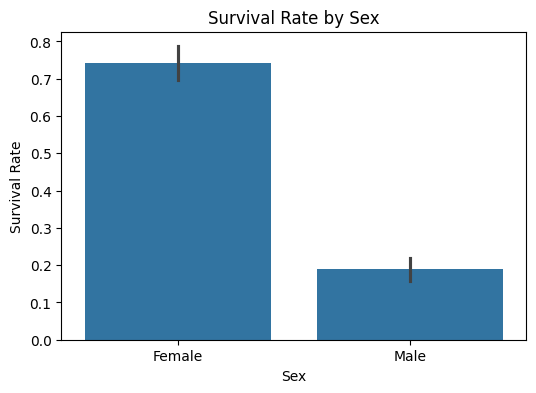

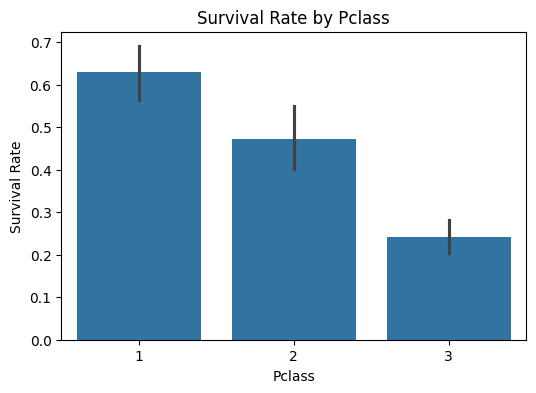

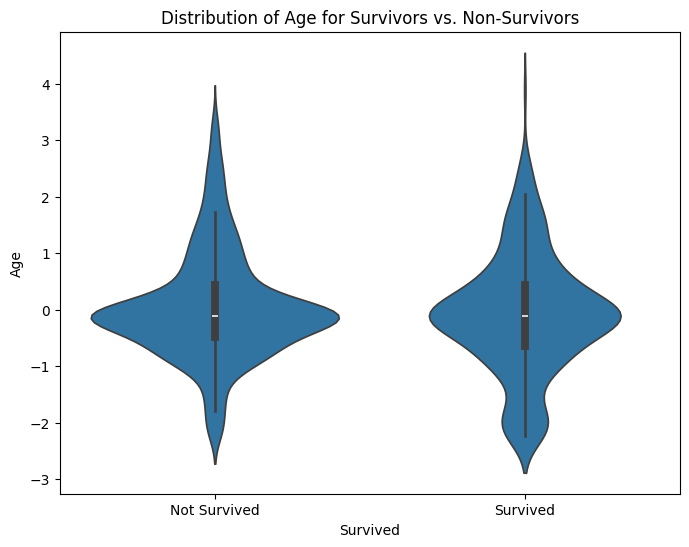

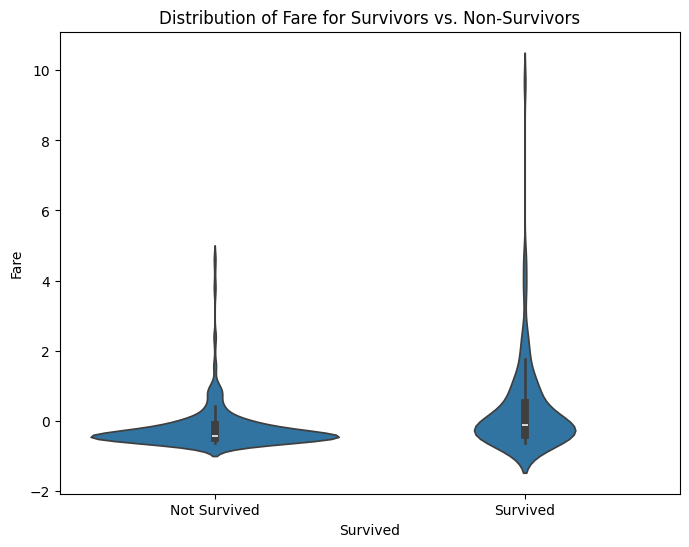

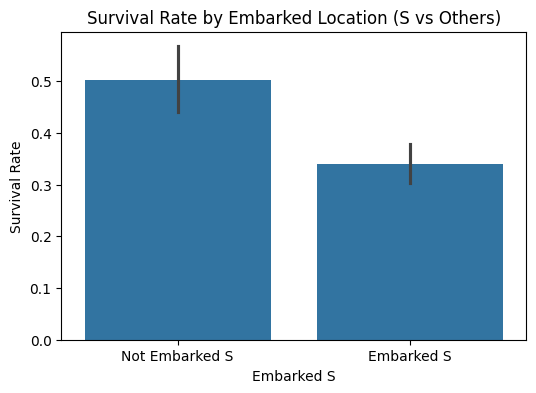

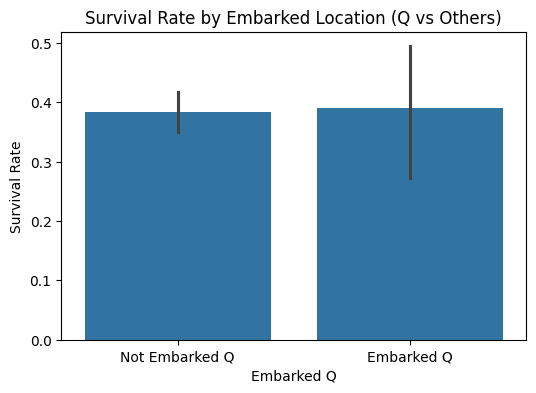

In [10]:
#Create a bar plot showing the survival rate for each sex rate
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Create a bar plot showing the survival rate for each 'Pclass'
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Create a violin plot showing the distribution of 'Age' for survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Distribution of Age for Survivors vs. Non-Survivors')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Create a violin plot showing the distribution of 'Fare' for survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Distribution of Fare for Survivors vs. Non-Survivors')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# Create a bar plot showing the survival rate for each 'Embarked' location
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked_S', y='Survived', data=df)
plt.title('Survival Rate by Embarked Location (S vs Others)')
plt.xticks([0, 1], ['Not Embarked S', 'Embarked S'])
plt.xlabel('Embarked S')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked_Q', y='Survived', data=df)
plt.title('Survival Rate by Embarked Location (Q vs Others)')
plt.xticks([0, 1], ['Not Embarked Q', 'Embarked Q'])
plt.xlabel('Embarked Q')
plt.ylabel('Survival Rate')
plt.show()

In [14]:
fig = px.bar(df, x="Sex_male", y="Survived", title="Survival Rate by Sex")
fig.show()

In [16]:
fig = go.Figure(data=[go.Bar(x=df["Ticket"], y=df["Ticket"].value_counts(), marker_color='orange')])
fig.update_layout(title='Interactive Bar Chart', xaxis_title='tickets', yaxis_title='overall')
fig.show()

In [20]:
fig = px.pie(
    df,
    values='Fare',
    names='Name',
    title='Fare Margin',
    hover_data=['Name'],
    color_discrete_sequence=px.colors.sequential.Plasma,
    template='plotly_white'
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()